In [11]:
# Written by Rahi Misra
# This file is meant to gain understanding of the data to influence preprocessing techniques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("InitialFormatting.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_2112\2124408740.py:7: DtypeWarning: Columns (4,9,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("InitialFormatting.csv")


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899360 entries, 0 to 899359
Data columns (total 51 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   tourney_id          899360 non-null  object
 1   tourney_name        899360 non-null  object
 2   surface             894784 non-null  object
 3   draw_size           899360 non-null  int64 
 4   tourney_level       899360 non-null  object
 5   tourney_date        899360 non-null  object
 6   match_num           899360 non-null  int64 
 7   winner_id           899360 non-null  int64 
 8   winner_seed         899360 non-null  int64 
 9   winner_entry        147761 non-null  object
 10  winner_name         899360 non-null  object
 11  winner_hand         879793 non-null  object
 12  winner_ht           899360 non-null  int64 
 13  winner_ioc          899352 non-null  object
 14  winner_age          899360 non-null  int64 
 15  loser_id            899360 non-null  int64 
 16  lo

In [13]:
# Split features into numeric and object
numeric_features = [
    'draw_size', 'match_num', 'winner_seed', 'winner_ht', 'winner_age',
    'loser_seed', 'loser_ht', 'loser_age', 'best_of', 'minutes', 'w_ace',
    'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced',
    'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
    'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points', 'winner_score', 'loser_score'
]

object_features = [
    'tourney_id', 'tourney_name', 'surface', 'tourney_level', 'tourney_date',
    'winner_entry', 'winner_id', 'winner_name', 'winner_hand', 'winner_ioc',
    'loser_entry', 'loser_id', 'loser_name', 'loser_hand', 'loser_ioc', 'score', 'round'
]


In [4]:
# Get a statistical summary
for column in numeric_features:
  Summary = df[column].describe()

  Count = Summary['count']
  Mean = Summary['mean']
  STD = Summary['std']
  Min = Summary['min']
  Max = Summary['max']
  Q1 = Summary['25%']
  Q2 = Summary['50%']
  Q3 = Summary['75%']
    
  # Calculate the IQR
  IQR = Q3 - Q1
  # Calculate the range
  Range = Max - Min
  # Calculate the Variance
  Variance = STD**2
  # Extract the mode values
  Mode = df[column].mode()
  Modes = Mode.tolist()
  # Calculate the skew
  Skew = df[column].skew()

  # Print each statistic on a new line
  print(f"\nColumn: {column}")
  print(f"Count: {Count: .3f}")
  print(f"Mean: {Mean: .3f}")
  print(f"Mode: {Modes}")
  print(f"Standard Deviation: {STD: .3f}")
  print(f"Variance: {Variance: .3f}")
  print(f"Min: {Min: .3f}")
  print(f"Max: {Max: .3f}")
  print(f"25th Percentile (Q1): {Q1: .3f}")
  print(f"50th Percentile (Median, Q2): {Q2: .3f}")
  print(f"75th Percentile (Q3): {Q3: .3f}")
  print(f"IQR: {IQR: .3f}")
  print(f"Range: {Range: .3f}")
  print(f"Skew: {Skew: .3f}")


Column: draw_size
Count:  899360.000
Mean:  39.751
Mode: [32]
Standard Deviation:  24.916
Variance:  620.795
Min:  0.000
Max:  128.000
25th Percentile (Q1):  32.000
50th Percentile (Median, Q2):  32.000
75th Percentile (Q3):  32.000
IQR:  0.000
Range:  128.000
Skew:  2.704

Column: match_num
Count:  899360.000
Mean:  78.751
Mode: [1]
Standard Deviation:  156.885
Variance:  24613.030
Min:  1.000
Max:  7316.000
25th Percentile (Q1):  10.000
50th Percentile (Median, Q2):  21.000
75th Percentile (Q3):  49.000
IQR:  39.000
Range:  7315.000
Skew:  13.413

Column: winner_seed
Count:  899360.000
Mean:  2.035
Mode: [0]
Standard Deviation:  3.402
Variance:  11.572
Min:  0.000
Max:  35.000
25th Percentile (Q1):  0.000
50th Percentile (Median, Q2):  0.000
75th Percentile (Q3):  3.000
IQR:  3.000
Range:  35.000
Skew:  2.800

Column: winner_ht
Count:  899360.000
Mean:  112.130
Mode: [0]
Standard Deviation:  90.034
Variance:  8106.198
Min:  0.000
Max:  211.000
25th Percentile (Q1):  0.000
50th Perce


Column: winner_score
Count:  899360.000
Mean:  10.943
Mode: [12]
Standard Deviation:  6.061
Variance:  36.740
Min:  0.000
Max:  99.000
25th Percentile (Q1):  12.000
50th Percentile (Median, Q2):  12.000
75th Percentile (Q3):  13.000
IQR:  1.000
Range:  99.000
Skew: -0.517

Column: loser_score
Count:  899360.000
Mean:  6.200
Mode: [0]
Standard Deviation:  4.958
Variance:  24.582
Min:  0.000
Max:  80.000
25th Percentile (Q1):  2.000
50th Percentile (Median, Q2):  6.000
75th Percentile (Q3):  9.000
IQR:  7.000
Range:  80.000
Skew:  0.873


In [5]:
df['tourney_level'] = df['tourney_level'].astype(str)
print(df['tourney_level'].value_counts())

tourney_level
S     429781
C     180207
A     140773
G      57758
15     28003
M      26896
D      19206
25     16187
F        549
Name: count, dtype: int64


In [6]:
# Calculate class distribution for all columns
for column in object_features:

    class_distribution = df[column].value_counts(normalize=True)

    print(f"\nClass Distribution for {column}:")
    print(class_distribution)



Class Distribution for tourney_id:
tourney_id
2023-580     0.000266
2010-580     0.000266
2017-560     0.000266
2017-540     0.000266
2017-520     0.000266
               ...   
1980-D006    0.000001
1977-3933    0.000001
1968-T166    0.000001
1968-T142    0.000001
1968-T162    0.000001
Name: proportion, Length: 30098, dtype: float64

Class Distribution for tourney_name:
tourney_name
Wimbledon                       0.018679
US Open                         0.018475
Roland Garros                   0.014613
Australian Open                 0.011254
M15 Monastir                    0.005654
                                  ...   
Davis Cup AME SF: ARG vs CHI    0.000002
Davis Cup G1 SF: PER vs USA     0.000002
Davis Cup WG QF: NZL vs GBR     0.000002
Quebec City                     0.000001
Cannes Chps                     0.000001
Name: proportion, Length: 8816, dtype: float64

Class Distribution for surface:
surface
Clay      0.471889
Hard      0.414810
Grass     0.058708
Carpet    0.0545

In [7]:
# Correlation Coefficient
from pandas import set_option
set_option('display.precision', 3)

correlation_matrix = df[numeric_features].corr()

print(correlation_matrix)

                    draw_size  match_num  winner_seed  winner_ht  winner_age  \
draw_size               1.000      0.206        0.172      0.110       0.055   
match_num               0.206      1.000        0.093      0.122       0.118   
winner_seed             0.172      0.093        1.000      0.125       0.089   
winner_ht               0.110      0.122        0.125      1.000       0.209   
winner_age              0.055      0.118        0.089      0.209       1.000   
loser_seed              0.122      0.090       -0.067      0.068       0.025   
loser_ht                0.149      0.136        0.061      0.426       0.186   
loser_age               0.009      0.105        0.051      0.221       0.205   
best_of                 0.527     -0.013       -0.007     -0.020      -0.020   
minutes                 0.226      0.279        0.111      0.299       0.209   
w_ace                   0.218      0.193        0.115      0.265       0.176   
w_df                    0.186      0.203

In [8]:
# Covariance
from pandas import set_option
set_option('display.precision', 3)

covariance = df[numeric_features].cov()
print(covariance)

                    draw_size  match_num  winner_seed  winner_ht  winner_age  \
draw_size             620.795    805.378       14.596    247.245       6.727   
match_num             805.378  24613.030       49.707   1716.314      90.158   
winner_seed            14.596     49.707       11.572     38.191       1.471   
winner_ht             247.245   1716.314       38.191   8106.198      91.614   
winner_age              6.727     90.158        1.471     91.614      23.678   
loser_seed              9.052     41.872       -0.680     18.196       0.363   
loser_ht              342.030   1959.334       19.102   3530.715      83.253   
loser_age               1.287     95.096        0.993    114.806       5.751   
best_of                 6.918     -1.066       -0.013     -0.957      -0.052   
minutes               249.742   1941.342       16.770   1193.811      45.088   
w_ace                  17.604     97.931        1.262     77.229       2.775   
w_df                    7.047     48.482

array([[<Axes: title={'center': 'draw_size'}>,
        <Axes: title={'center': 'match_num'}>,
        <Axes: title={'center': 'winner_seed'}>,
        <Axes: title={'center': 'winner_ht'}>,
        <Axes: title={'center': 'winner_age'}>,
        <Axes: title={'center': 'loser_seed'}>],
       [<Axes: title={'center': 'loser_ht'}>,
        <Axes: title={'center': 'loser_age'}>,
        <Axes: title={'center': 'best_of'}>,
        <Axes: title={'center': 'minutes'}>,
        <Axes: title={'center': 'w_ace'}>,
        <Axes: title={'center': 'w_df'}>],
       [<Axes: title={'center': 'w_svpt'}>,
        <Axes: title={'center': 'w_1stIn'}>,
        <Axes: title={'center': 'w_1stWon'}>,
        <Axes: title={'center': 'w_2ndWon'}>,
        <Axes: title={'center': 'w_SvGms'}>,
        <Axes: title={'center': 'w_bpSaved'}>],
       [<Axes: title={'center': 'w_bpFaced'}>,
        <Axes: title={'center': 'l_ace'}>,
        <Axes: title={'center': 'l_df'}>,
        <Axes: title={'center': 'l_svp

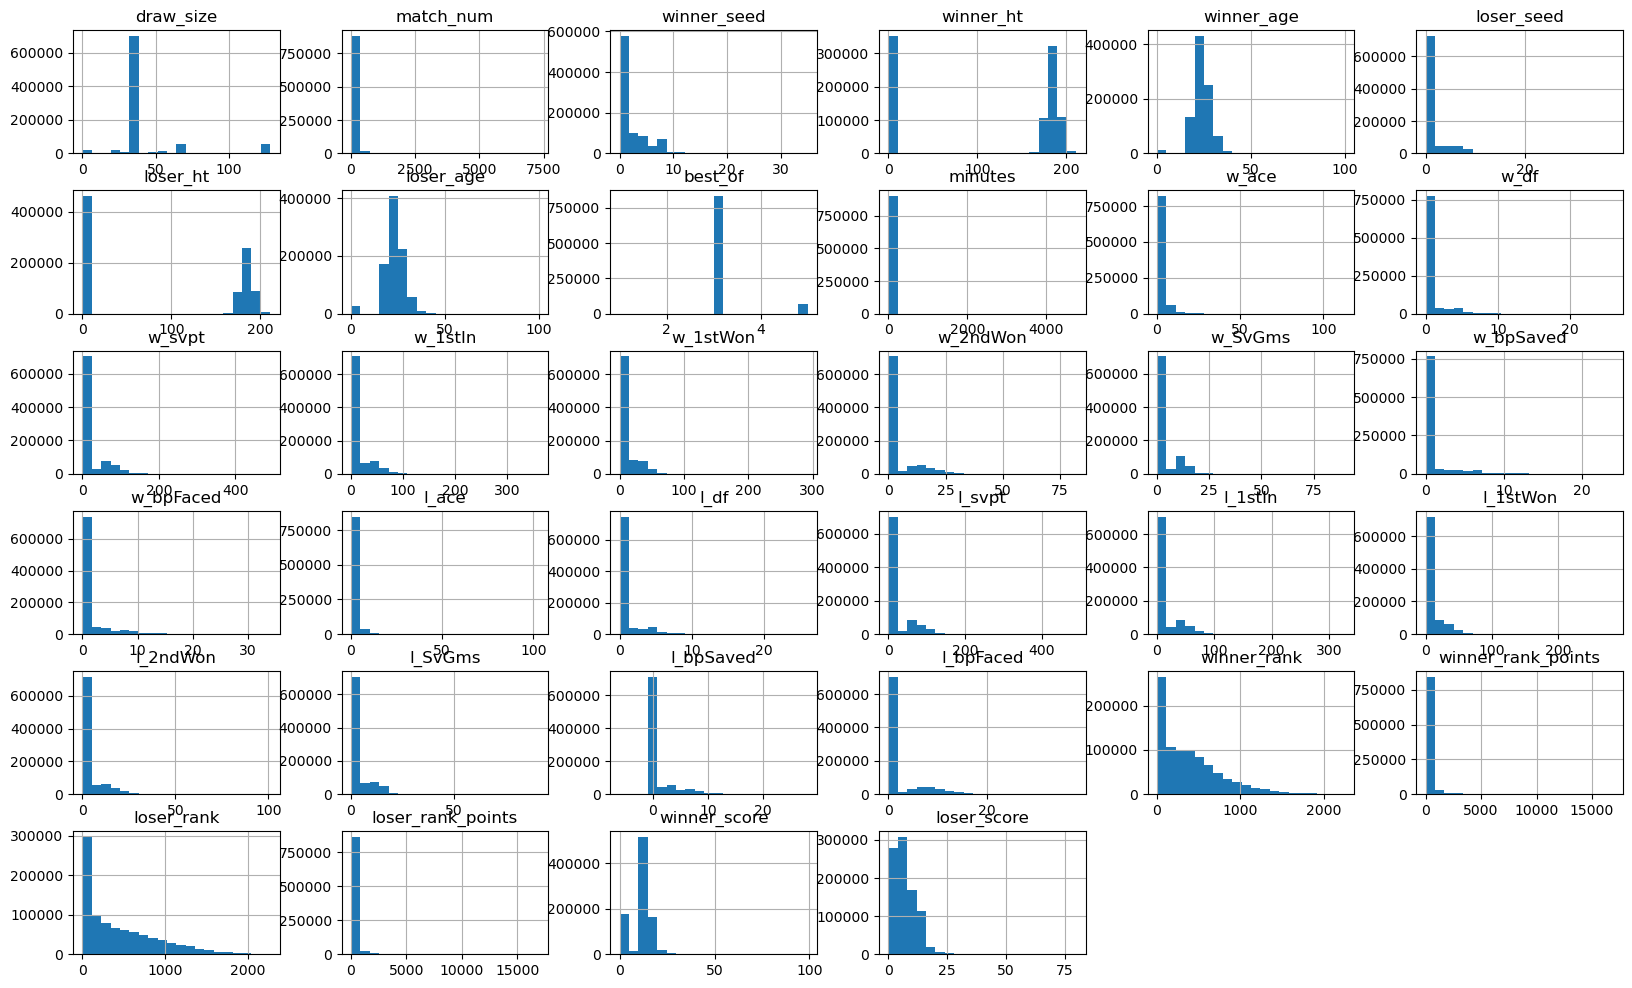

In [9]:
# Histogram
df[numeric_features].hist(bins=20, figsize=(20, 12))

draw_size                Axes(0.125,0.841881;0.352273x0.0381188)
match_num             Axes(0.547727,0.841881;0.352273x0.0381188)
winner_seed              Axes(0.125,0.796139;0.352273x0.0381188)
winner_ht             Axes(0.547727,0.796139;0.352273x0.0381188)
winner_age               Axes(0.125,0.750396;0.352273x0.0381188)
loser_seed            Axes(0.547727,0.750396;0.352273x0.0381188)
loser_ht                 Axes(0.125,0.704653;0.352273x0.0381188)
loser_age             Axes(0.547727,0.704653;0.352273x0.0381188)
best_of                  Axes(0.125,0.658911;0.352273x0.0381188)
minutes               Axes(0.547727,0.658911;0.352273x0.0381188)
w_ace                    Axes(0.125,0.613168;0.352273x0.0381188)
w_df                  Axes(0.547727,0.613168;0.352273x0.0381188)
w_svpt                   Axes(0.125,0.567426;0.352273x0.0381188)
w_1stIn               Axes(0.547727,0.567426;0.352273x0.0381188)
w_1stWon                 Axes(0.125,0.521683;0.352273x0.0381188)
w_2ndWon              Axe

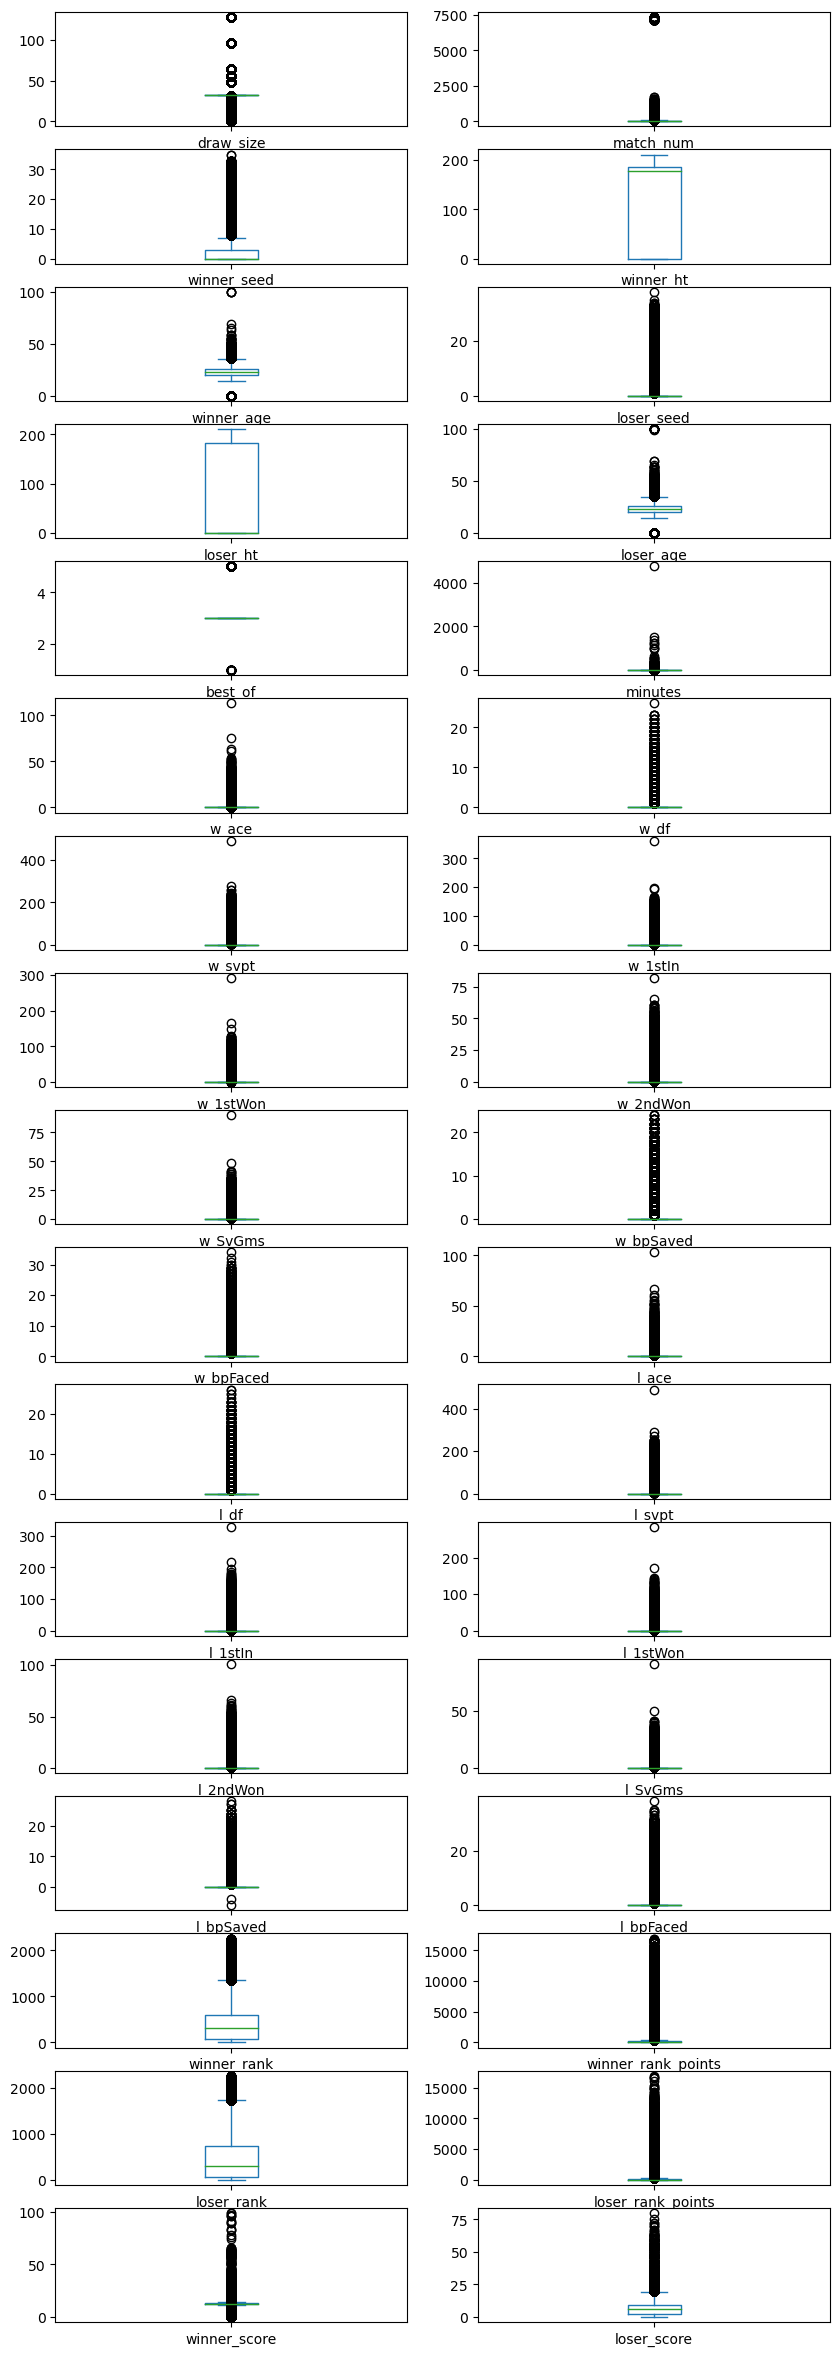

In [14]:
# Boxplot
df[numeric_features].plot(kind='box', subplots=True, layout=(17, 2), figsize=(10, 30), sharex=False, sharey=False)

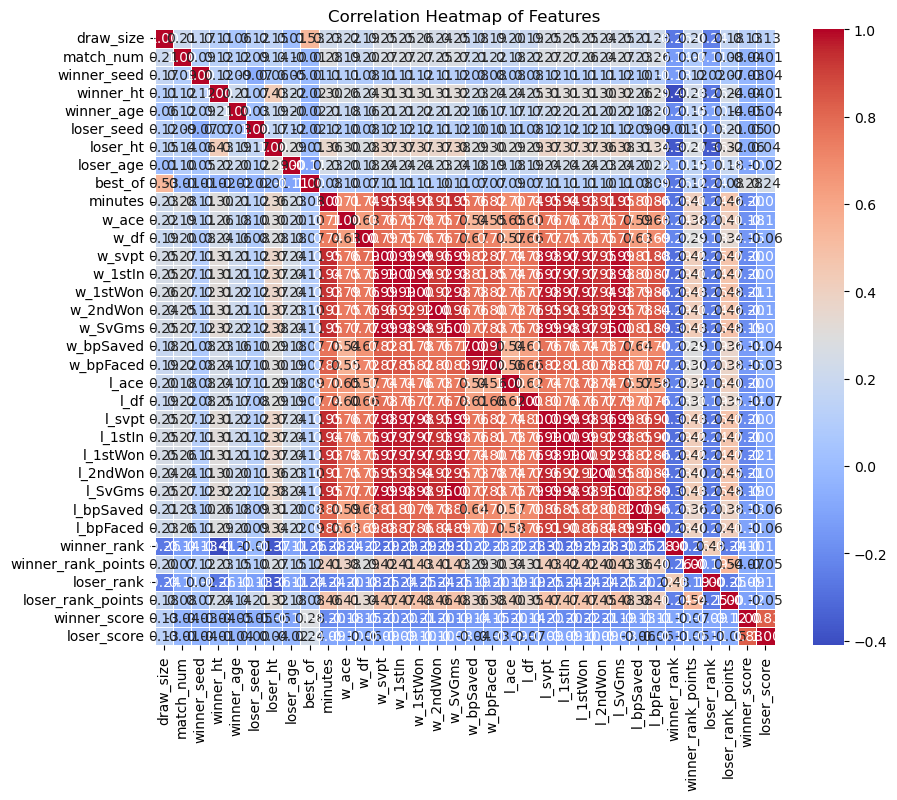

In [12]:
# Calculate the correlation matrix
correlation_matrix = df[numeric_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [13]:
print(df['winner_score'].value_counts())

winner_score
12    375205
0     174106
13    104486
16     47830
15     43427
       ...  
76         1
74         1
49         1
48         1
65         1
Name: count, Length: 78, dtype: int64


In [14]:
print(df['best_of'].value_counts())

best_of
3    831964
5     67360
1        36
Name: count, dtype: int64


In [15]:
print(df['loser_score'].value_counts())

loser_score
0     181143
6      83545
5      81208
7      76333
4      66659
       ...  
70         1
69         1
80         1
75         1
71         1
Name: count, Length: 73, dtype: int64


In [16]:

df.to_csv("InitialUnderstanding.csv", index=False)

In [ ]:
# Create a scatter matrix
from pandas.plotting import scatter_matrix

scatter_matrix(df[numeric_features], figsize=(12, 10), diagonal='hist', alpha=0.5)